# Programación Lineal
---
🔹 **Identificación de variables de decisión**  
🔹 **Optimización con Programación Lineal**  

###  **Objetivo:**  
Aprender la aplicación de **programación lineal** para resolver problemas de optimización.


# **Identificación de Variables de Decisión y programación lineal**
Pensemos en el siguiente **Problema** sobre  **Producción de Sillas y Mesas**:

Una fábrica produce **sillas** y **mesas**. Cada silla genera **$5 de ganancia** y cada mesa **$8**. La producción está limitada por:  

- **40 horas de trabajo disponibles**  
- **30 unidades de madera disponibles**  

Cada silla requiere **4 horas de trabajo** y **3 unidades de madera**, mientras que cada mesa requiere **5 horas de trabajo** y **6 unidades de madera**.

**Objetivo:** Determinar cuántas **sillas** y **mesas** deben producirse para **maximizar la ganancia**.

---
## **Pasos para Identificar las Variables de Decisión**
### **1️⃣ Leer y Comprender el Problema**
Antes de definir las variables, es fundamental entender:
- **¿Qué estamos maximizando o minimizando?** (Ejemplo: ganancias, costos, recursos).  
- **¿Qué está bajo nuestro control o qué podemos manipular?** (Ejemplo: unidades a producir, recursos a asignar, cantidad de una sustancia a utilizar, cantidad de material a utilizar).  

### **2️⃣ Identificar las Cantidades a Determinar**

Las **variables de decisión** son los valores desconocidos que necesitamos determinar para encontrar la mejor solución a un problema de optimización.  
Estas variables representan **acciones bajo nuestro control o que podemos manipular** y afectan la **función objetivo** y las **restricciones**.

En pocas palabras, las variables de decisión corresponden a **las incógnitas del problema**.  
Algunas preguntas clave:
- ¿Qué valores afectan directamente la solución?  
- ¿Qué decisiones podemos tomar dentro del problema?

Para formular matemáticamente el problema, debemos identificar **qué cantidades queremos determinar**.

En nuestro ejemplo:
- **¿Qué estamos decidiendo?** → **Cuántas sillas y mesas producir** 
- **Definición matemática:**
  - \( x_1 \) = Número de **sillas** a producir  
  - \( x_2 \) = Número de **mesas** a producir  

- Estas variables definirán la solución del problema.
- La **función objetivo** dependerá de estas variables.
- Las **restricciones** como el tiempo y la madera también dependen de \( x_1 \) y \( x_2 \).

---

### **3️⃣ Definir las Variables Matemáticamente**
Las variables deben representarse con símbolos claros.  
En nuestro ejemplo:
- **\( x_1 \) y \( x_2 \)** determinan la solución.
- La **función objetivo** se expresa como:
  $$
  \max \quad 5x_1 + 8x_2
  $$
  donde **\( x_1 \)** representa el número de **sillas** a producir y **\( x_2 \)** el número de **mesas**.

- Las **restricciones** del problema se escriben como ecuaciones en función de \( x_1 \) y \( x_2 \):

  - **Restricción de horas de trabajo**:  
    Cada silla requiere **4 horas** y cada mesa **5 horas** de trabajo.  
    Como solo hay **40 horas disponibles**, se plantea la restricción:
    $$
    4x_1 + 5x_2 \leq 40
    $$

  - **Restricción de madera**:  
    Cada silla requiere **3 unidades de madera** y cada mesa **6 unidades**.  
    Como hay **30 unidades disponibles**, la restricción es:
    $$
    3x_1 + 6x_2 \leq 30
    $$

  - **Restricciones de no negatividad**:  
    No podemos producir una cantidad negativa de sillas o mesas, por lo que:
    $$
    x_1 \geq 0, \quad x_2 \geq 0
    $$

---

### **4️⃣ Verificar la Validez de las Variables**
- **¿Las variables permiten expresar la función objetivo?** Sí.  
- **¿Las restricciones dependen de estas variables?** Sí.  
- **¿Tienen sentido en el contexto del problema?** Sí.  

---
# Ejemplo práctico de programación lineal

### **LHS (Left-Hand Side) y RHS (Right-Hand Side) en las Restricciones**
En cualquier ecuación o inecuación matemática, los términos pueden separarse en:

- **LHS (Left-Hand Side - Lado Izquierdo)**: Es la parte de la ecuación antes del signo de desigualdad o igualdad.  


- **RHS (Right-Hand Side - Lado Derecho)**: Es el valor límite después del signo de desigualdad o igualdad.  

**Ejemplo completo de una restricción desglosada (horas de trabajo):**
$$
4x_1 + 5x_2 \leq 40
$$
- **LHS** → \( 4x_1 + 5x_2 \) (horas requeridas para producción).  
- **RHS** → \( 40 \) (horas disponibles).  
- **Signo \( $\leq$ \)** → Indica que **no podemos exceder las 40 horas disponibles**.

In [46]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo (maximizar 5x1 + 8x2)
c = [-5, -8]  # Se usan negativos porque linprog minimiza por defecto
c

[-5, -8]

In [47]:
# Coeficientes de las restricciones (LHS)
A = [
    [4,5 ],  # Restricción de horas de trabajo [sillas, mesa] 
    [3,6 ]   # Restricción de madera [silla, mesa]
]
A

[[4, 5], [3, 6]]

In [48]:
# Lado derecho de las restricciones (RHS)
b = [40,30 ]
b

[40, 30]

In [49]:
# Límites de las variables (no pueden ser negativas)
# x_bounds = [(lower_x1, upper_x1), (lower_x2, upper_x2)]
# None si no hay límite, o si el limite es infinito
x_bounds = [(0, None), (0, None)]

# Resolver el problema usando el método símplex
resultado = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method="highs")

# Obtener los valores óptimos de las variables y la ganancia máxima
solucion_x1 = resultado.x[0]
solucion_x2 = resultado.x[1]
ganancia_maxima = -resultado.fun  # Se invierte el signo para obtener la maximización

round(solucion_x1), round(solucion_x2), round(ganancia_maxima)

(10, 0, 50)

In [50]:
print(f"x1:{round(solucion_x1)}, x2:{round(solucion_x2)}, Ganancia máxima:{round(ganancia_maxima)}")

x1:10, x2:0, Ganancia máxima:50


# Método Gráfico

Dada la inecuación:

$$
4x_1 + 5x_2 \leq 40
$$

**Despejamos \( x_2 \):**
1. Restamos \( 4x_1 \) en ambos lados:
   $$
   5x_2 \leq 40 - 4x_1
   $$
2. Dividimos todo entre **5**:
   $$
   x_2 \leq \frac{40 - 4x_1}{5}
   $$

En **Python**, esta expresión se representaría como:

```python
x2_vals_trabajo = (40 - 4*x1_vals) / 5
```
Lo mismo para madera
    $$
    3x_1 + 6x_2 \leq 30
    $$

```python
x2_vals_madera = (30 - 3*x1_vals) / 6
```

In [51]:

import numpy as np
import matplotlib.pyplot as plt

# cada silla require 4 horas, en 40 horas prod hay maximo 10
# Crear el espacio de valores para x1 y x2
# Osea, SIMULAMOS los valores posibles de x1
x1_vals = np.linspace(0, 10,10 , dtype=int)
x1_vals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10])

In [52]:
x2_vals_trabajo = ( 40 - 4 *x1_vals) / 5  # Restricción de horas de trabajo despejando x2
x2_vals_trabajo

array([8. , 7.2, 6.4, 5.6, 4.8, 4. , 3.2, 2.4, 1.6, 0. ])

In [53]:
x2_vals_madera = ( 30-3 *x1_vals) / 6  # Restricción de madera despejando x2
x2_vals_madera

array([5. , 4.5, 4. , 3.5, 3. , 2.5, 2. , 1.5, 1. , 0. ])

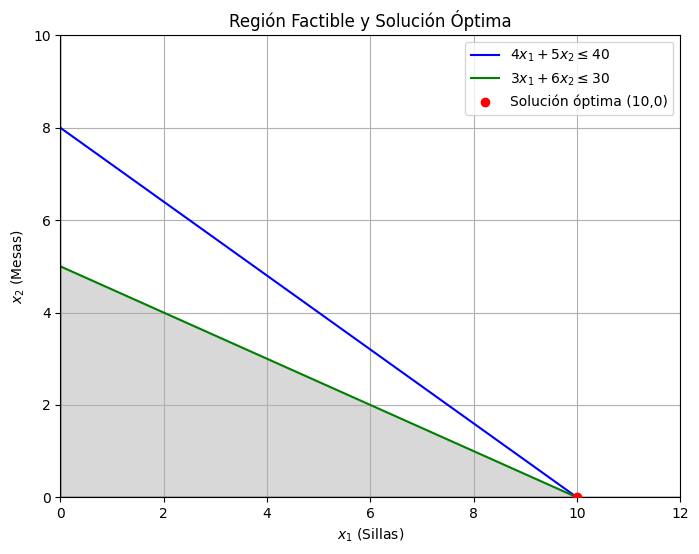

In [54]:

# Configurar el gráfico
plt.figure(figsize=(8, 6))
plt.xlim(0, 12)
plt.ylim(0, 10)

# Dibujar las restricciones
plt.plot(x1_vals, x2_vals_trabajo, label=r'$4x_1 + 5x_2 \leq 40$', color="blue")
plt.plot(x1_vals, x2_vals_madera, label=r'$3x_1 + 6x_2 \leq 30$', color="green")

# Rellenar la región factible en color gris
plt.fill_between(x1_vals, np.minimum(x2_vals_trabajo, x2_vals_madera), 0, color='gray', alpha=0.3)

# Marcar la solución óptima -> Esta marca es manual una vez que la encontramos
plt.scatter(10, 0, color="red", zorder=3, label="Solución óptima (10,0)")

# Etiquetas y título
plt.xlabel(r'$x_1$ (Sillas)')
plt.ylabel(r'$x_2$ (Mesas)')
plt.title("Región Factible y Solución Óptima")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()


#### ¿Por qué despejamos \( x_2 \) y no \( x_1 \) en el método gráfico?

En el método gráfico de programación lineal, despejamos \( x_2 \) en función de \( x_1 \) para facilitar la representación en un plano cartesiano. La razón principal es que las gráficas en 2D se suelen trazar en función de \( x_1 \) (eje horizontal) y \( x_2 \) (eje vertical).


### **Actividad**: Ingeniería en Nanotecnología - Optimización de insumos para biosensores

Responde utilizando programación lineal y método gráfico lo siguiente:

Una empresa de nanotecnología diseña biosensores utilizando dos tipos de nanopartículas: **Plata (NP-Ag)** y **Grafeno (NP-G)**.

- Cada mg de **NP-Ag** aporta 5 unidades de conductividad y 3 unidades de estabilidad térmica.
- Cada mg de **NP-G** aporta 4 unidades de conductividad y 6 unidades de estabilidad térmica.
- El biosensor requiere al menos **120 unidades de conductividad** y **150 unidades de estabilidad térmica**.
- El costo por mg de NP-Ag es de **$8** y el de NP-G es de **$10**.

**Objetivo:** Determinar la cantidad mínima de cada nanopartícula que debe utilizarse para satisfacer las condiciones técnicas al menor costo posible.

### Tu resolución con programación lineal:

In [55]:
s=[8,10]
s


[8, 10]

In [67]:
R = [
    [-5,-4 ], 
    [-3,-6 ]   
]
R

[[-5, -4], [-3, -6]]

In [74]:
f=[-120,-150]

In [75]:
x_bounds = [(0, None), (0, None)]

# Resolver el problema usando el método símplex
resultado = linprog(s, A_ub=R, b_ub=f, bounds=x_bounds, method="highs")

# Obtener los valores óptimos de las variables y la ganancia máxima
sol_x1 = resultado.x[0]
sol_x2 = resultado.x[1]
ganancia = -resultado.fun # Se invierte el signo para obtener la maximización

round(sol_x1), round(sol_x2), round(ganancia)

(7, 22, -270)

In [96]:
print(f"x1:{round(sol_x1,2)}, x2:{round(sol_x2,2)}, costo minima:{round(ganancia)}")

x1:6.67, x2:21.67, costo minima:-270


### Tu resolución método gráfico:

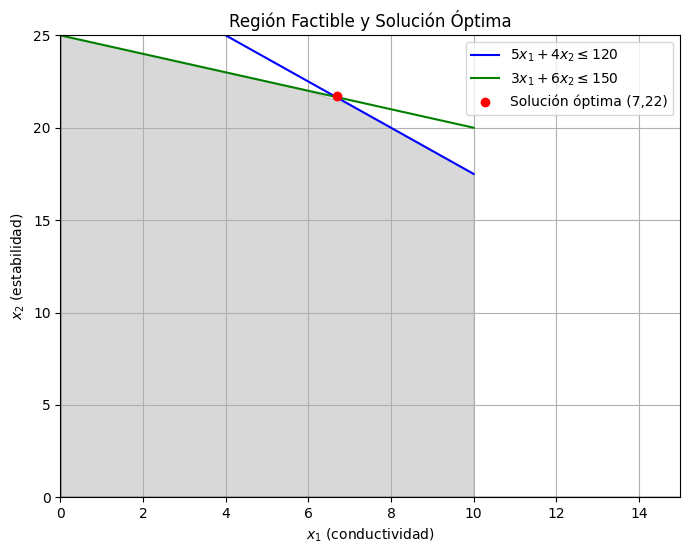

In [94]:
# Configurar el gráfico
plt.figure(figsize=(8, 6))
plt.xlim(0, 15)
plt.ylim(0, 25)

# Dibujar las restricciones
plt.plot(x1_valr, x2_vals, label=r'$5x_1 + 4x_2 \leq 120$', color="blue")
plt.plot(x1_valr, x2_vals_2, label=r'$3x_1 + 6x_2 \leq 150$', color="green")

# Rellenar la región factible en color gris
plt.fill_between(x1_valr, np.minimum(x2_vals, x2_vals_2), 0, color='gray', alpha=0.3)

# Marcar la solución óptima -> Esta marca es manual una vez que la encontramos
plt.scatter(6.70, 21.7, color="red", zorder=3, label="Solución óptima (7,22)")

# Etiquetas y título
plt.xlabel(r'$x_1$ (conductividad)')
plt.ylabel(r'$x_2$ (estabilidad)')
plt.title("Región Factible y Solución Óptima")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

### **Actividad Responde las siguientes preguntas**
1️⃣ ¿Qué significaría, desde el punto de vista técnico, que la solución óptima incluya 0 mg de una de las nanopartículas? ¿Qué implicaciones tendría esto en el desempeño del biosensor?

2️⃣ Si se descubriera que la NP-G tiene una tasa de reacción más lenta y debe limitarse a un máximo de 20 mg, ¿cómo modificarías el modelo para reflejar esta nueva restricción?

3️⃣ El modelo supone costos fijos por mg. ¿Cómo cambiaría tu estrategia si el proveedor ofrece descuentos por volumen a partir de cierto umbral? ¿Se puede seguir usando linprog para resolverlo?

4️⃣ En un entorno real, ¿qué otras variables técnicas o económicas deberías considerar para tomar una decisión completa sobre la composición del biosensor?

### **Actividad: Ejercicio (Avanzado de Programación Lineal)**

En este ejercicio resolverás un problema complejo de optimización lineal utilizando:
- **Método Numérico**: `scipy.optimize.linprog`.

El método visual no será necesario porque son 3 variables. 

---
### **Planteamiento del Problema**
Una empresa fabrica **tres tipos de productos**: **A, B y C**. 
Cada producto genera una ganancia distinta:
- **Producto A**: $10 de ganancia
- **Producto B**: $15 de ganancia
- **Producto C**: $25 de ganancia

### **Restricciones:**
- **Disponibilidad de materia prima**: 80 unidades disponibles.
- **Disponibilidad de horas de trabajo**: 100 horas disponibles.
- **Capacidad de producción diaria**: Máximo 30 unidades en total.

Cada producto requiere los siguientes recursos:
| Producto | Materia Prima | Horas de Trabajo |
|----------|--------------|------------------|
| A        | 4            | 5                |
| B        | 6            | 3                |
| C        | 5            | 8                |

**Objetivo**: Determinar cuántas unidades de cada producto deben producirse para **maximizar la ganancia**.

Resuelve el ejercicio en las celdas markdown/python que sean necesarias a partir de la siguiente:

### Tu resolución método de programación lineal:
Consejo: Al final, al dar tus resultados redondea con la función de python `round()`

### Actividad de investigación y programación

Investiga como realizar el mismo ejercicio con la libreria  `pulp` y compara los resultados.

In [61]:
# Instalación de la librería
%pip install pulp

Note: you may need to restart the kernel to use updated packages.


##  Actividad: **Preguntas para Reflexión**
1️⃣ **Método Numérico:** ¿Cuáles son los valores óptimos de producción obtenidos con `linprog`? ¿Cómo se interpreta la ganancia máxima?

2️⃣ **Interpretación:** ¿Cómo cambiaría la solución si la disponibilidad de materia prima aumenta a 100 unidades?

4️⃣ **Extensión:** Si agregáramos restricciones de almacenamiento o demanda mínima de productos, ¿cómo modificarías el modelo?